In [4]:
#Data processing and manipulation Libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Deep learning libraries
import tensorflow as tsf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

#Evaluation and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
#Loading the dataset
file_path=input("Please enter the path to your training data set: ")
data=pd.read_csv(file_path)

Please enter the path to your training data set:  Data/Customers.csv


In [6]:
#Data Inspection(Basic)
print("Data shape:", data.shape)
print(data.info())
print(data.describe())

Data shape: (2000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688           

In [7]:
#Checking for the missing values
print(data.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [8]:
#Filling in the missing values with the median method

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values in categorical columns with the mode
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [9]:
#Conversion of categorical values (if any) into nuerical values
data=pd.get_dummies(data, drop_first=True)

In [16]:
# Splitting the data into features (X) and target (y)
for_X = input("Please enter the parameter(s) for features (X) (comma-separated for multiple columns): ").split(",")
for_y = input("Please enter the parameter for Target (y): ")

# Strip any leading or trailing spaces from input columns
for_X = [x.strip() for x in for_X]
for_y = for_y.strip()

# Check if the input columns exist in the DataFrame
missing_features = [col for col in for_X if col not in data.columns]
if for_y not in data.columns:
    print(f"Error: Target column '{for_y}' not found in DataFrame.")
elif missing_features:
    print(f"Error: The following feature columns were not found in DataFrame: {missing_features}")
else:
    # Drop the target column from features
    X = data.drop(for_X, axis=1)
    y = data[for_y]

    print("Features (X):")
    print(X.head())
    print("Target (y):")
    print(y.head())

Please enter the parameter(s) for features (X) (comma-separated for multiple columns):  Age
Please enter the parameter for Target (y):  CustomerID


Features (X):
   CustomerID  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0           1              15000                      39                1   
1           2              35000                      81                3   
2           3              86000                       6                1   
3           4              59000                      77                0   
4           5              38000                      40                2   

   Family Size  Gender_Male  Profession_Doctor  Profession_Engineer  \
0            4         True              False                False   
1            3         True              False                 True   
2            1        False              False                 True   
3            2        False              False                False   
4            6        False              False                False   

   Profession_Entertainment  Profession_Executive  Profession_Healthcare  \
0                   

In [17]:
#Scaling features using StandardScalar (AKA: Normalization)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
#Splitting the data into training and Testing sets
#Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (1600, 14)
X_test shape: (400, 14)


In [20]:
from tensorflow.keras import Input

# Initializing the sequential model
model = Sequential()

# Add an Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Add first hidden layer
model.add(Dense(128, activation='relu'))

# Adding one more hidden layer with a Drop-out
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Drop-out necessary to avoid overfitting

# Adding an output layer for binary classification example
model.add(Dense(1, activation='sigmoid'))  # OR 'softmax' for multi-class classification

# Compiling the model with an optimizer, loss function, and metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Show (print) the model's architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 6.5853e-04 - loss: -1111.9625 - val_accuracy: 0.0000e+00 - val_loss: -6615.6094
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.0010 - loss: -9914.9189 - val_accuracy: 0.0000e+00 - val_loss: -28656.4062
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 1.1948e-04 - loss: -37144.1680 - val_accuracy: 0.0000e+00 - val_loss: -89337.8828
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 7.7711e-05 - loss: -114154.6797 - val_accuracy: 0.0000e+00 - val_loss: -219445.0000
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 3.7163e-04 - loss: -256620.2188 - val_accuracy: 0.0000e+00 - val_loss: -449064.2500
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 4.6702e-04 - loss: -523034.7188 - val_accuracy: 0.0000e+00 - val_loss: -809916.2500
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 1.6368e-04 - loss: -885171.6875 - val_accuracy: 0.0000e+00 - va

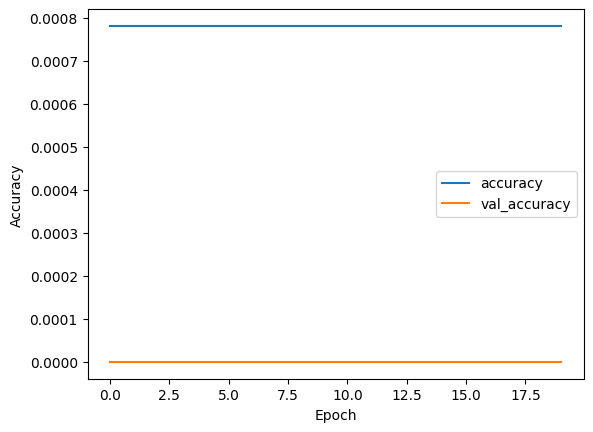

In [21]:
#Training the built model
history=model.fit(X_train,y_train,validation_split=0.2,epochs=20,batch_size=32,verbose=1)

#Plot training history (loss and accuracy over epochs)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Import necessary evaluation metrics with zero_division handling
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the trained model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Model evaluation metrics with zero_division to handle precision issues
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       1.0
          60       0.00      0.00      0.00       1.0
          64       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          70       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00      

In [ ]:
# Saving the final model in the recommended Keras format
model.save('first_dl_model.keras')

In [ ]:
#To load the model later
model = tf.keras.models.load_model('<name>.keras')